In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import urllib
import requests
import os
import io
import json
import pylab as pl
import shapely
from fiona.crs import from_epsg
import geopandas as gpd
import json
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
pz=gpd.GeoDataFrame.from_file("/nfshome"+"/cl4855"+"/ADS"+"/How-greenspace-makes-the-green"+"/Parks Zones"+"/geo_export_a90dc41c-f8a9-41e2-a7cc-d3f837c229b3.shp")

In [191]:
gs=gpd.GeoDataFrame.from_file("/nfshome"+"/cl4855"+"/ADS"+"/How-greenspace-makes-the-green"+"/Green Spaces"+"/geo_export_082cf1b6-52ed-40bb-9b52-13945bdb1f98.shp")

In [22]:
gs.crs

{'init': 'epsg:4326'}

In [192]:
gs.head()

,feat_code,landuse,park_name,parknum,shape_area,shape_leng,source_id,status,sub_code,system,geometry
0,4910.0,Community Park,Commodore Barry Park,B021,41539.801363,829.420107,2.149100e+10,Updated,491050.0,None,POLYGON ((-73.97922375065221 40.69799879369959...
1,4980.0,Neighborhood Park,Pierrepont Playground,B222,21960.494920,607.555193,2.149800e+10,Unchanged,498000.0,None,POLYGON ((-73.99732028095745 40.69600764072165...
2,4980.0,Neighborhood Park,Cobble Hill Park,B326,28079.076265,784.421990,2.149800e+10,Unchanged,498000.0,None,POLYGON ((-73.99557419919979 40.68792918280799...
3,4980.0,Community Park,Commodore Barry Park,B021,438416.114511,2672.710150,2.149800e+10,Unchanged,498000.0,None,POLYGON ((-73.97746661925957 40.69650941986475...
4,4980.0,Triangle/Plaza,Brooklyn Heights Promenade,B223DG,14465.699799,1376.106398,2.149800e+10,Unchanged,498000.0,None,POLYGON ((-73.99746719287955 40.69692380834881...


In [193]:
len(set(gs['park_name']))

2031

In [194]:
len(set(pz['propname']))

102

In [31]:
pz.subcategor.unique()

array(['Large Park Zone', 'Beach Zone', 'Flagship Park Zone',
       'Sitting Area/Triangle/Mall', None], dtype=object)

In [13]:
pz.sitename

0                    Wolfe's Pond Park Zone 1
1                      Shore Road Park Zone 2
2                                Oakland Lake
3                           Crotona Park Lake
4                          Rockaway Beach 11b
5                          Rockaway Beach 01b
6      Wildlife Sanct. & 119 St Tennis Courts
7                  Ocean Parkway Malls Zone 7
8                           Sutton Place Park
9                     Fort Greene Park Zone 3
10              Roy Wilkins Rec Center Zone 3
11          Great Lawn And Cleopatra's Needle
12                                  NE Forest
13                           Rockaway Beach 9
14                      Pelham Parkway Zone 1
15                          Central Park West
16                   104th St. Softball Field
17                                   Beach 84
18                     Fort Tryon Park Zone 3
19                    Morningside Park Zone 3
20                          Isham Park Zone 1
21                        EAST RIV

In [27]:
pz.head()

,acres,borough,communityb,councildis,department,descriptio,gispropnum,location,nys_assemb,nys_senate,omppropid,precinct,propname,retired,retireddat,sitename,subcategor,us_congres,zipcode,geometry
0,115.968447,R,503,51,R-03,Wolfe's Pond Park Zone 1,R031,"Hylan Blvd, Luten Ave, Eylandt St, Chisholm St...",62,24,R031-ZN01,123,Wolfe's Pond Park,False,None,Wolfe's Pond Park Zone 1,Large Park Zone,11,"10309, 10312",POLYGON ((-74.19321766990006 40.52592464916578...
1,15.616045,B,310,43,B-10,Shore Park And Parkway-Shore Road Park Zone 2,B082,72nd St To Harbor View,64,22,B082-ZN02,2,Shore Park And Parkway,False,None,Shore Road Park Zone 2,Large Park Zone,11,11209,"POLYGON ((-74.04053539765398 40.6300837191109,..."
2,29.961577,Q,411,23,Q-07A,Alley Pond Park-Oakland Lake,Q001,"Springfield Blvd, 46th Ave, Garland Dr, 56th Ave",26,16,Q001-ZN07,111,Alley Pond Park,False,None,Oakland Lake,Large Park Zone,6,11364,POLYGON ((-73.76052073978084 40.75921702188668...
3,8.009824,X,203,17,X-03,Crotona Park Lake,X010,"Crotona Park East, Indian Lake, Picnic Area",79,33,X010-ZN01,42,Crotona Park,False,None,Crotona Park Lake,Large Park Zone,15,10457,POLYGON ((-73.89346452125582 40.83948578405597...
4,7.316096,Q,414,32,Q-14,Rockaway Beach & Boardwalk-Rockaway Beach 11b,Q164,Btwn 142nd And 146th St,23,15,Q164-ZN11B,100,Rockaway Beach & Boardwalk,False,None,Rockaway Beach 11b,Beach Zone,5,11694,POLYGON ((-73.86031014832309 40.56813188719809...


In [28]:
len(set(pz.propname))

102

In [29]:
pz.shape[0]

586

In [4]:
gs.head()

,feat_code,landuse,park_name,parknum,shape_area,shape_leng,source_id,status,sub_code,system,geometry
0,4910.0,Community Park,Commodore Barry Park,B021,41539.801363,829.420107,2.149100e+10,Updated,491050.0,None,POLYGON ((-73.97922375065221 40.69799879369959...
1,4980.0,Neighborhood Park,Pierrepont Playground,B222,21960.494920,607.555193,2.149800e+10,Unchanged,498000.0,None,POLYGON ((-73.99732028095745 40.69600764072165...
2,4980.0,Neighborhood Park,Cobble Hill Park,B326,28079.076265,784.421990,2.149800e+10,Unchanged,498000.0,None,POLYGON ((-73.99557419919979 40.68792918280799...
3,4980.0,Community Park,Commodore Barry Park,B021,438416.114511,2672.710150,2.149800e+10,Unchanged,498000.0,None,POLYGON ((-73.97746661925957 40.69650941986475...
4,4980.0,Triangle/Plaza,Brooklyn Heights Promenade,B223DG,14465.699799,1376.106398,2.149800e+10,Unchanged,498000.0,None,POLYGON ((-73.99746719287955 40.69692380834881...


In [9]:
gs.shape_area.describe()

count    1.249100e+04
mean     9.427334e+04
std      9.924306e+05
min      2.229973e+01
25%      1.534914e+03
50%      3.578557e+03
75%      1.670844e+04
max      6.299085e+07
Name: shape_area, dtype: float64

In [14]:
bin = [0,1535,3578,16708,62990850]

In [15]:
gs['area'] = pd.cut(gs['shape_area'],bin)

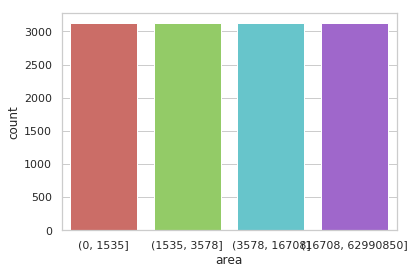

In [20]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x = 'area', data = gs, palette = 'hls')
plt.show()

In [40]:
facility=pd.read_csv("/nfshome"+"/cl4855"+"/ADS"+"/How-greenspace-makes-the-green"+"/Parks Zones"+"/Directory_of_Parks_Disability_Accessibility_Facilities_and_Programs.csv")

In [41]:
facility.head()

,Name,Location,Type
0,Tremont Park,Arthur Avenue & East Tremont Avenue,Bocce Courts
1,Ferry Point Park,Corner of Balcom Avenue and Dewey Avenue,Basketball Courts
2,Franz Sigel Park,E 153 St. & Grand Concourse,Basketball Courts
3,Gun Hill Playground,Holland Ave. & Magenta St.,Basketball Courts
4,Macombs,E 158th St. & Ruppert Plaza,Basketball Courts


In [ ]:
facility.shape[0]

In [42]:
df=pd.DataFrame(facility.groupby(['Name','Type']).size().reset_index())

In [43]:
facility=pd.pivot_table(df,index='Name',columns='Type',values=0,fill_value=0)

In [44]:
facility=facility.reset_index()

In [45]:
parkfa=facility.merge(pz,right_on="propname",left_on="Name")

In [23]:
len(set(gs.park_name))

2031

In [22]:
gs.shape[0]

12491

In [24]:
len(set(facility.Name))

731

In [20]:
facility.head()

Type,Name,Baseball Fields,Basketball Courts,Bathrooms,Beaches,Bocce Courts,Football Fields,Ice Skating Rinks,Nature Centers,Playgrounds,Pools,Recreation Centers,Tennis Courts
0,100% Playground,0,0,0,0,0,0,0,0,1,0,0,0
1,110th St & Lenox Ave Playground,0,0,0,0,0,0,0,0,1,0,0,0
2,110th St Playground,0,0,0,0,0,0,0,0,1,0,0,0
3,115th Street Playground,0,0,0,0,0,0,0,0,1,0,0,0
4,157th St Playground,0,0,0,0,0,0,0,0,1,0,0,0


In [46]:
parkfa.head()

,Name,Baseball Fields,Basketball Courts,Bathrooms,Beaches,Bocce Courts,Football Fields,Ice Skating Rinks,Nature Centers,Playgrounds,...,omppropid,precinct,propname,retired,retireddat,sitename,subcategor,us_congres,zipcode,geometry
0,Bloomingdale Park,0,0,1,0,0,0,0,0,1,...,R106-ZN02,123,Bloomingdale Park,False,None,Bloomingdale Park Zone 2,Large Park Zone,11,10309,POLYGON ((-74.21152212620758 40.53391366977822...
1,Bloomingdale Park,0,0,1,0,0,0,0,0,1,...,R106-ZN01,123,Bloomingdale Park,False,None,Bloomingdale Park Zone 1,Large Park Zone,11,10309,POLYGON ((-74.22280620386226 40.53326378423717...
2,Bloomingdale Park,0,0,1,0,0,0,0,0,1,...,R106-ZN03,3,Bloomingdale Park,False,None,Bloomingdale Park Zone 3,Large Park Zone,11,10309,POLYGON ((-74.20814980464327 40.53551445313607...
3,Carl Schurz Park,0,0,1,0,0,0,0,0,0,...,M081-ZN02,3,Carl Schurz Park,False,None,Carl Schurz Promenade,Large Park Zone,12,10028,POLYGON ((-73.94401274946013 40.77549901252149...
4,Carl Schurz Park,0,0,1,0,0,0,0,0,0,...,M081-ZN01,2,Carl Schurz Park,False,None,Carl Schurz Main Lawn,Large Park Zone,12,10028,POLYGON ((-73.94259426055146 40.77526153637332...


In [71]:
parkfageo = parkfa[['Name','geometry']]

In [80]:
parkfageo = gpd.GeoDataFrame(parkfageo)

In [81]:
parkfageo = parkfageo.dissolve(by='Name')

In [86]:
park=parkfageo.merge(facility,on="Name")

In [87]:
park.head()

,Name,geometry,Baseball Fields,Basketball Courts,Bathrooms,Beaches,Bocce Courts,Football Fields,Ice Skating Rinks,Nature Centers,Playgrounds,Pools,Recreation Centers,Tennis Courts
0,Bloomingdale Park,(POLYGON ((-74.21152212620758 40.5339136697782...,0,0,1,0,0,0,0,0,1,0,0,0
1,Carl Schurz Park,POLYGON ((-73.94259426055146 40.77526153637332...,0,0,1,0,0,0,0,0,0,0,0,0
2,Conference House Park,POLYGON ((-74.25024120770684 40.49747637123968...,0,0,1,0,0,0,0,0,0,0,0,0
3,Crocheron Park,POLYGON ((-73.76594883414562 40.77043224484991...,0,0,0,0,0,0,0,0,0,0,0,1
4,Crotona Park,(POLYGON ((-73.89756590868625 40.8364389088575...,0,0,0,0,0,0,0,0,0,0,0,1


In [88]:
park['area'] = park['geometry'].apply(lambda x: (x.area * 111**2))

In [95]:
green=gs[['park_name','geometry']]

In [97]:
green=green.dissolve(by='park_name')

In [98]:
greenfa=green.merge(facility,left_on='park_name',right_on='Name')

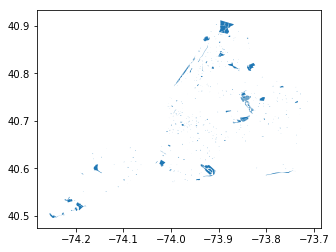

In [106]:
greenfa.plot()

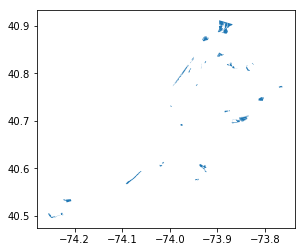

In [105]:
park.plot()

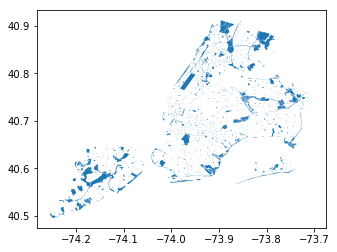

In [108]:
gs.plot()

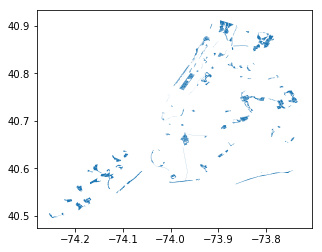

In [109]:
pz.plot()

In [197]:
dog=pd.read_json('DPR_DogRuns_001.json')
bbq=pd.read_json('DPR_Barbecue_001.json')
basket=pd.read_json('DPR_Basketball_001.json')
eat=pd.read_json('DPR_Eateries_001.json')
plg=pd.read_json('DPR_Playgrounds_001.json')
ten=pd.read_json('DPR_Tennis_001.json')
skt=pd.read_json('DPR_IceSkating_001.json')

In [198]:
ten['facility']='Tennis'
bbq['facility']='Barbecue'
dog['facility']='Dogfriend'
basket['facility']='Basketball'
eat['facility']='Eateries'
plg['facility']='Playground'
skt['facility']='skate'

In [199]:
bbq=bbq[['Prop_ID','facility']]
ten=ten[['Prop_ID','facility']]
dog=dog[['Prop_ID','facility']]
basket=basket[['Prop_ID','facility']]
eat=eat[['park_id','facility']]
plg=plg[['Prop_ID','facility']]
skt=skt[['Prop_ID','facility']]

In [200]:
eat=pd.DataFrame(eat)

In [201]:
eat.rename(columns={'park_id':'Prop_ID'},inplace=True)

In [202]:
facility=pd.concat([bbq,ten,dog,basket,eat,plg,skt])

In [203]:
df=pd.DataFrame(facility.groupby(['Prop_ID','facility']).size().reset_index())

In [204]:
facility=pd.pivot_table(df,index='Prop_ID',columns='facility',values=0,fill_value=0)

In [205]:
facility=facility.reset_index()

In [206]:
facility=facility.iloc[1:]

In [207]:
greenspace=gpd.GeoDataFrame(gs[['parknum','geometry']])
greenspace = greenspace.dissolve(by='parknum')
greenspace=greenspace.reset_index()
facilitygs=facility.merge(greenspace,left_on='Prop_ID',right_on="parknum")

In [208]:
facilitygs.head()

facility,Prop_ID,Barbecue,Basketball,Dogfriend,Eateries,Playground,Tennis,skate,parknum,geometry
0,B001,0,1,0,0,1,0,0,B001,POLYGON ((-73.95819910692008 40.72846909429816...
1,B007,0,1,0,0,1,1,0,B007,(POLYGON ((-74.00191712205063 40.5944044883299...
2,B008,0,1,0,0,1,0,0,B008,(POLYGON ((-73.91136560837775 40.6638884536345...
3,B012,0,1,1,0,2,0,0,B012,POLYGON ((-73.94195616711707 40.67311713865221...
4,B016,0,1,0,1,2,0,0,B016,POLYGON ((-73.92396891415979 40.70211749600103...


In [209]:
facilitygs['area'] = facilitygs['geometry'].apply(lambda x: (x.area * 111**2))

In [90]:
parkzone=gpd.GeoDataFrame(pz[['gispropnum','geometry']])

In [92]:
parkzone = parkzone.dissolve(by='gispropnum')

In [107]:
parkzone=parkzone.reset_index()

In [108]:
facilitypz=facility.merge(parkzone,left_on='Prop_ID',right_on="gispropnum")

In [111]:
facilitypz['area'] = facilitypz['geometry'].apply(lambda x: (x.area * 111**2))

In [113]:
facilitypz.head()

facility,Prop_ID,Barbecue,Basketball,Dogfriend,Eateries,Playground,Tennis,skate,gispropnum,geometry,area
0,B018,0,1,1,0,1,0,0,B018,(POLYGON ((-73.8804756741291 40.63571240115446...,0.796912
1,B028,0,1,2,0,2,1,0,B028,(POLYGON ((-74.01842481974427 40.6067978207152...,0.243400
2,B032,1,1,1,0,2,1,0,B032,POLYGON ((-73.97359974922539 40.69171771933037...,0.165564
3,B054,0,1,1,0,1,1,0,B054,(POLYGON ((-73.92493161992556 40.6674028146497...,0.112753
4,B057,0,2,1,1,4,1,0,B057,(POLYGON ((-73.92431008321688 40.5922243351517...,0.927570


In [147]:
parkname=pz[['gispropnum','propname']]
parkname=parkname.drop_duplicates()

In [210]:
greenname=gs[['parknum','park_name']]
greenname=greenname.drop_duplicates()

In [152]:
parkname.loc[parkname.propname == 'Riverside Park']

,gispropnum,propname
6,M071,Riverside Park
41,M048,Riverside Park
114,M140,Riverside Park
136,M072,Riverside Park


In [134]:
facilitypz.head()

facility,Prop_ID,Barbecue,Basketball,Dogfriend,Eateries,Playground,Tennis,skate,gispropnum,geometry,area
0,B018,0,1,1,0,1,0,0,B018,(POLYGON ((-73.8804756741291 40.63571240115446...,0.796912
1,B028,0,1,2,0,2,1,0,B028,(POLYGON ((-74.01842481974427 40.6067978207152...,0.243400
2,B032,1,1,1,0,2,1,0,B032,POLYGON ((-73.97359974922539 40.69171771933037...,0.165564
3,B054,0,1,1,0,1,1,0,B054,(POLYGON ((-73.92493161992556 40.6674028146497...,0.112753
4,B057,0,2,1,1,4,1,0,B057,(POLYGON ((-73.92431008321688 40.5922243351517...,0.927570


In [211]:
gsfacility=facilitygs.merge(greenname,on="parknum",how="inner")

In [212]:
gsfacility.head()

facility,Prop_ID,Barbecue,Basketball,Dogfriend,Eateries,Playground,Tennis,skate,parknum,geometry,area,park_name
0,B001,0,1,0,0,1,0,0,B001,POLYGON ((-73.95819910692008 40.72846909429816...,0.004740,American Playground
1,B007,0,1,0,0,1,1,0,B007,(POLYGON ((-74.00191712205063 40.5944044883299...,0.091409,Bensonhurst Park
2,B008,0,1,0,0,1,0,0,B008,(POLYGON ((-73.91136560837775 40.6638884536345...,0.057211,Betsy Head Park
3,B008,0,1,0,0,1,0,0,B008,(POLYGON ((-73.91136560837775 40.6638884536345...,0.057211,Betsy Head
4,B008,0,1,0,0,1,0,0,B008,(POLYGON ((-73.91136560837775 40.6638884536345...,0.057211,Greenstreet


In [162]:
facility=facilitypz.merge(parkname,on="gispropnum",how="inner")

In [163]:
facility.head()

facility,Prop_ID,Barbecue,Basketball,Dogfriend,Eateries,Playground,Tennis,skate,gispropnum,geometry,area,propname
0,B018,0,1,1,0,1,0,0,B018,(POLYGON ((-73.8804756741291 40.63571240115446...,0.796912,Canarsie Park
1,B028,0,1,2,0,2,1,0,B028,(POLYGON ((-74.01842481974427 40.6067978207152...,0.243400,Dyker Beach Park
2,B032,1,1,1,0,2,1,0,B032,POLYGON ((-73.97359974922539 40.69171771933037...,0.165564,Fort Greene Park
3,B054,0,1,1,0,1,1,0,B054,(POLYGON ((-73.92493161992556 40.6674028146497...,0.112753,Lincoln Terrace Park / Arthur S. Somers
4,B057,0,2,1,1,4,1,0,B057,(POLYGON ((-73.92431008321688 40.5922243351517...,0.927570,Marine Park


In [213]:
gsfacility=gpd.GeoDataFrame(gsfacility)

In [178]:
facility=gpd.GeoDataFrame(facility)

In [216]:
gsfacility.to_file(driver = 'ESRI Shapefile', filename='green_facility')

In [170]:
facility.to_file(driver = 'ESRI Shapefile', filename='park_facility')

In [171]:
%run ~/choroplethNYC.py

Usage: choroplathNYC <path to shapefile> <column>

Options:
  -h, --help            show this help message and exit
  -d, --discrete        discrete steps color bar
  -m CMAP, --cmap=CMAP  matplotlib colormap name
  -t TITLE, --title=TITLE
                        title of figure
  -o OUTPUT, --output=OUTPUT
                        output file  (must be pylab compatible extension, e.g.
                        pdf png etc
  --clobber             clobber output file
  --noshow              do not show figure (default)
  --debug               print debug statements


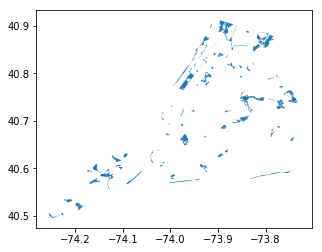

In [166]:
facility.plot()

TypeError: float() argument must be a string or a number, not 'Point'

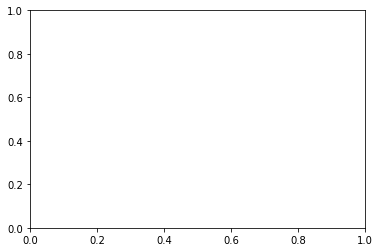

In [187]:
plot(facility['Center'])

TypeError: float() argument must be a string or a number, not 'Point'

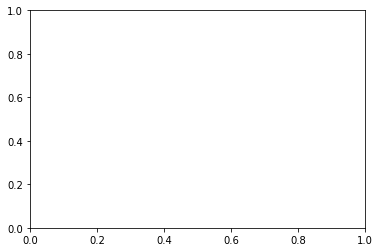

In [183]:
plt.hlines(facility['Center'], xmin=0, xmax=len(facility), lw=1.)

In [189]:
facility.shape

(89, 13)

(<matplotlib.figure.Figure at 0x7f27316adda0>,
 <matplotlib.colorbar.Colorbar at 0x7f273162ee80>)

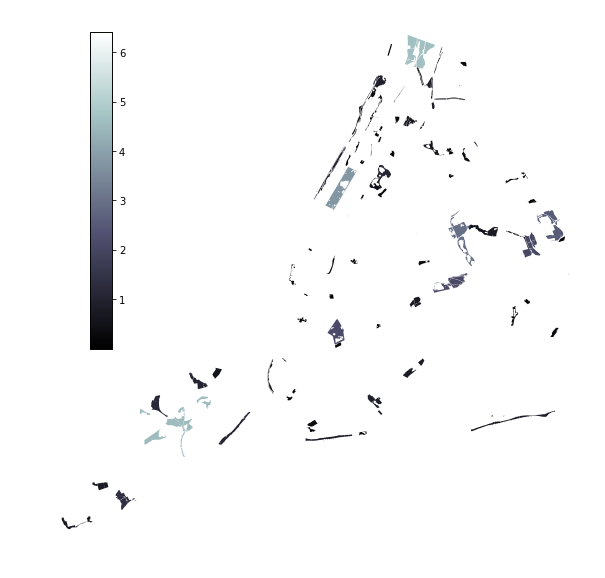

In [175]:
choroplethNYC(facility,column="area",cmap="bone")